# Grid Study and Sensitivity Analysis

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#import kelp_param
import kelp3d_objs as k3
import ipyparallel as ipp
import concurrent.futures as cf
import itertools as it
#from sympy import divisors
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize as opt
from scipy.interpolate import interp1d
import ipyvolume as ipv

import kelp_compute
import kelp_analyze

In [3]:
import sqlite3
import shutil
import os

In [5]:
#remote_config = kelp_param.ParamSpanRemoteConfig()
ipc = ipp.Client()
lv = ipc.load_balanced_view()
dv = ipc.direct_view()
print(ipc.ids)

[0]


/home/oliver/local/miniconda3/envs/kelp/lib/python3.6/site-packages/ipyparallel/client/client.py:459: RuntimeWarning: 
            Controller appears to be listening on localhost, but not on this machine.
            If this is true, you should specify Client(...,sshserver='you@oliver-arch')
            or instruct your controller to listen on an external IP.
  RuntimeWarning)


def cdkelp():
    import os
    os.chdir('/global/homes/o/oevans/kelp/code/python')
dv.apply(cdkelp)

### Define Constants

In [6]:
# Hard-coded parameters
rope_spacing = 5.0 # (m)
zmin, zmax = 0.0, 10.0 # (m)

# Light from above
I0 = 50.0 # (W/m^2)
phi_s = 0 # (rad)
theta_s = 0 # (rad)
decay = 0 # (?) - light (practically) only from directly above

# Calculated or otherwise boring parameters
xmin = -rope_spacing/2
xmax = rope_spacing/2
ymin = -rope_spacing/2
ymax = rope_spacing/2

# Solver parameters
lis_options = "-i gmres -restart 10000 -tol 1e-4"

# Grid Study 1

In [85]:
# Set parameters
study_name = 'gs1'
a_water = 0.179
b = 0.219
kelp_dist='top-heavy'
ns_max = 10
nz_max = 10
na_max = 10
ns_list = range(4, ns_max+1, 2)
nz_list = range(4, nz_max+1, 2)
na_list = range(4, na_max+1, 2)
lis_opts = '-i gmres -restart 100'
# TODO: Make this default?
base_dir = '../../results'

ns_list = [4,6]
nz_list = [4,6]
na_list = [4,6]

# TODO: Don't actually delete results
shutil.rmtree(os.path.join(data_dir, study_name), ignore_errors=True)

combine_thread, gs_fut = kelp_compute.grid_study_compute(
    study_name, 
    a_water, b, kelp_dist,
    ns_list, nz_list, na_list,
    lis_opts, base_dir=base_dir
)

/home/oliver/local/miniconda3/envs/kelp/lib/python3.6/site-packages/ipyparallel/client/client.py:459: RuntimeWarning: 
            Controller appears to be listening on localhost, but not on this machine.
            If this is true, you should specify Client(...,sshserver='you@oliver-arch')
            or instruct your controller to listen on an external IP.
  RuntimeWarning)


1 futures done.
2 futures done.
3 futures done.
4 futures done.
5 futures done.
6 futures done.
7 futures done.
8 futures done.
Combining ../../results/gs1/data/9ua1si35.db (tables: [('gs1',), ('sqlite_sequence',)])
read.
Combining ../../results/gs1/data/llm0ai97.db (tables: [('gs1',), ('sqlite_sequence',)])
read.
Combining ../../results/gs1/data/d_s418um.db (tables: [('gs1',), ('sqlite_sequence',)])
read.
Combining ../../results/gs1/data/13zbjw4a.db (tables: [('gs1',), ('sqlite_sequence',)])
read.
Combining ../../results/gs1/data/l5qtabek.db (tables: [('gs1',), ('sqlite_sequence',)])
read.
Combining ../../results/gs1/data/c_ekc2a3.db (tables: [('gs1',), ('sqlite_sequence',)])
read.
Combining ../../results/gs1/data/zaafg1lz.db (tables: [('gs1',), ('sqlite_sequence',)])
read.
Combining ../../results/gs1/data/7hcevmrc.db (tables: [('gs1',), ('sqlite_sequence',)])
read.


In [84]:
ls ../../results/gs1/data/

2rmapr3g.db  cj0t8uy7.nc  hevce0dv.db  j9hzdn9y.nc  sxhwdo14.db  y9e552_v.nc
2rmapr3g.nc  eolqkx15.db  hevce0dv.nc  kj7999_7.db  sxhwdo14.nc
cj0t8uy7.db  eolqkx15.nc  j9hzdn9y.db  kj7999_7.nc  y9e552_v.db


In [50]:
[fut.stdout for fut in gs_fut]

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']

In [44]:
[f.result() for f in gs_fut.values()]

AttributeError: 'list' object has no attribute 'values'

In [19]:
print([f.stdout for f in gs_fut.values()][0])

a_kelp = 2000.0
xmin = -7.5
xmax = 7.5
nx = 4
ymin = -7.5
ymax = 7.5
ny = 4
zmin = 0
zmax = 10
nz = 4
frond_lengths.shape = (4,)
frond_stds.shape = (4,)
num_fronds.shape = (4,)
water_speeds.shape = (4,)
water_angles.shape = (4,)
fs = 0.5
fr = 5.0
ft = 0.0004
p_kelp.shape = (4, 4, 4)
absorptance_kelp: 0.8 (<class 'float'>)
a_water: 0.179 (<class 'float'>)
b: 0.219 (<class 'float'>)
ns: 4 (<class 'int'>)
na: 4 (<class 'int'>)
nx: 4 (<class 'int'>)
ny: 4 (<class 'int'>)
nz: 4 (<class 'int'>)
ntheta: 4 (<class 'int'>)
nphi: 4 (<class 'int'>)
nomega: 10 (<class 'int'>)
num_dens: 150 (<class 'int'>)
kelp_dist: top-heavy (<class 'str'>)
CREATE STR VAR: ('kelp_dist', 'S9', 'kelp_dist_dim')



In [ ]:
for sz, fut in gs_fut.items():
    print(sz)
    print(fut.stdout)
    print()

In [9]:
conn = sqlite3.connect(db_path)
df = kelp_analyze.table_to_df(conn, 'gs1')
conn.close()
df

,id,absorptance_kelp,a_water,b,ns,nz,na,num_dens,kelp_dist,fs,...,num_scatters,fd_flag,lis_opts,date,git_commit,compute_time,lis_iter,lis_time,lis_resid,data_path
0,1,0.8,0.179,0.219,4.0,4.0,4.0,150.0,top-heavy,0.5,...,1,0,-i gmres -restart 100,Tue Jul 10 10:56:13 2018,c9f2a2aed85fe675309b61fa005f8bd7aad085e2,0.005532,0,0.0,0.0,/home/oliver/academic/research/kelp/results/gs...
1,2,0.8,0.179,0.219,4.0,4.0,6.0,150.0,top-heavy,0.5,...,1,0,-i gmres -restart 100,Tue Jul 10 10:56:13 2018,c9f2a2aed85fe675309b61fa005f8bd7aad085e2,0.008422,0,0.0,0.0,/home/oliver/academic/research/kelp/results/gs...
2,3,0.8,0.179,0.219,4.0,4.0,8.0,150.0,top-heavy,0.5,...,1,0,-i gmres -restart 100,Tue Jul 10 10:56:13 2018,c9f2a2aed85fe675309b61fa005f8bd7aad085e2,0.035944,0,0.0,0.0,/home/oliver/academic/research/kelp/results/gs...
3,4,0.8,0.179,0.219,4.0,4.0,10.0,150.0,top-heavy,0.5,...,1,0,-i gmres -restart 100,Tue Jul 10 10:56:13 2018,c9f2a2aed85fe675309b61fa005f8bd7aad085e2,0.026058,0,0.0,0.0,/home/oliver/academic/research/kelp/results/gs...
4,5,0.8,0.179,0.219,4.0,6.0,4.0,150.0,top-heavy,0.5,...,1,0,-i gmres -restart 100,Tue Jul 10 10:56:13 2018,c9f2a2aed85fe675309b61fa005f8bd7aad085e2,0.013050,0,0.0,0.0,/home/oliver/academic/research/kelp/results/gs...
5,6,0.8,0.179,0.219,4.0,6.0,6.0,150.0,top-heavy,0.5,...,1,0,-i gmres -restart 100,Tue Jul 10 10:56:14 2018,c9f2a2aed85fe675309b61fa005f8bd7aad085e2,0.021204,0,0.0,0.0,/home/oliver/academic/research/kelp/results/gs...
6,7,0.8,0.179,0.219,4.0,6.0,8.0,150.0,top-heavy,0.5,...,1,0,-i gmres -restart 100,Tue Jul 10 10:56:14 2018,c9f2a2aed85fe675309b61fa005f8bd7aad085e2,0.021475,0,0.0,0.0,/home/oliver/academic/research/kelp/results/gs...
7,8,0.8,0.179,0.219,4.0,6.0,10.0,150.0,top-heavy,0.5,...,1,0,-i gmres -restart 100,Tue Jul 10 10:56:14 2018,c9f2a2aed85fe675309b61fa005f8bd7aad085e2,0.043410,0,0.0,0.0,/home/oliver/academic/research/kelp/results/gs...
8,9,0.8,0.179,0.219,4.0,8.0,4.0,150.0,top-heavy,0.5,...,1,0,-i gmres -restart 100,Tue Jul 10 10:56:14 2018,c9f2a2aed85fe675309b61fa005f8bd7aad085e2,0.017332,0,0.0,0.0,/home/oliver/academic/research/kelp/results/gs...
9,10,0.8,0.179,0.219,4.0,8.0,6.0,150.0,top-heavy,0.5,...,1,0,-i gmres -restart 100,Tue Jul 10 10:56:14 2018,c9f2a2aed85fe675309b61fa005f8bd7aad085e2,0.027413,0,0.0,0.0,/home/oliver/academic/research/kelp/results/gs...


## Analyze

In [10]:
conn = sqlite3.connect(db_path)
res = kelp_analyze.query_results(conn, table_name, ns=10, nz=10, na=10)[0]
conn.close()
irrad = res['irrad'][:].data

In [11]:
irrad

array([[[ 4.00156135e+01,  2.53365958e+01,  1.60619061e+01,
          9.57622856e+00,  6.02052216e+00,  3.32517532e+00,
          1.58742841e+00,  6.54875026e-01,  1.26461243e-02,
         -8.66539757e-01],
        [ 3.99371596e+01,  2.50437123e+01,  1.57686307e+01,
          9.20007520e+00,  5.35226118e+00,  3.01227490e+00,
          1.89162614e+00,  6.82268607e-01, -3.17098620e-01,
         -1.14831554e+00],
        [ 3.98196123e+01,  2.44944881e+01,  1.47505885e+01,
          8.90295142e+00,  4.39194063e+00,  2.41155342e+00,
          1.32554873e+00,  5.55242354e-01, -4.48628551e-01,
         -7.75486952e-01],
        [ 3.97815954e+01,  2.38639106e+01,  1.37652650e+01,
          7.07272399e+00,  3.80290072e+00,  1.82268776e+00,
          1.12110854e+00,  6.00527482e-01, -1.57316128e-01,
         -7.74590948e-01],
        [ 3.98621831e+01,  2.30546843e+01,  1.18236221e+01,
          6.83082030e+00,  3.01148262e+00,  1.67457583e+00,
          1.01770113e+00,  5.18180930e-01, -2.195139

In [12]:
perceived_irrad_dict, abs_err_arr, rel_err_arr, compute_time_dict = (
    kelp_analyze.grid_study_analyze(db_path, table_name)
)

ns=10, nz=4, na=10
ns=10, nz=6, na=10
ns=10, nz=8, na=10
ns=4, nz=10, na=10
ns=6, nz=10, na=10
ns=8, nz=10, na=10
ns=10, nz=10, na=4
ns=10, nz=10, na=6
ns=10, nz=10, na=8


/home/oliver/academic/research/kelp/code/python/kelp_analyze.py:232: RuntimeWarning: invalid value encountered in true_divide
  perceived_irrad = np.sum(p_kelp*irrad, axis=(0,1)) / np.sum(p_kelp, axis=(0,1))


In [13]:
list(zip(*perceived_irrad_dict.keys()))

[(10, 10, 10, 10, 4, 6, 8, 10, 10, 10),
 (10, 4, 6, 8, 10, 10, 10, 10, 10, 10),
 (10, 10, 10, 10, 10, 10, 10, 4, 6, 8)]

In [14]:
ns_list, nz_list, na_list = (set(z) for z in zip(*perceived_irrad_dict.keys()))

In [15]:
ns_list

{4, 6, 8, 10}

ns


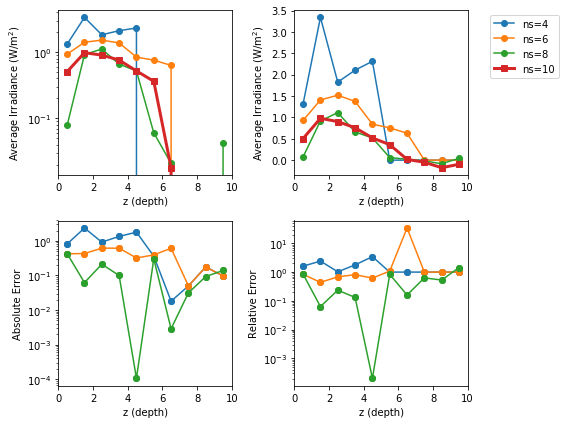

nz


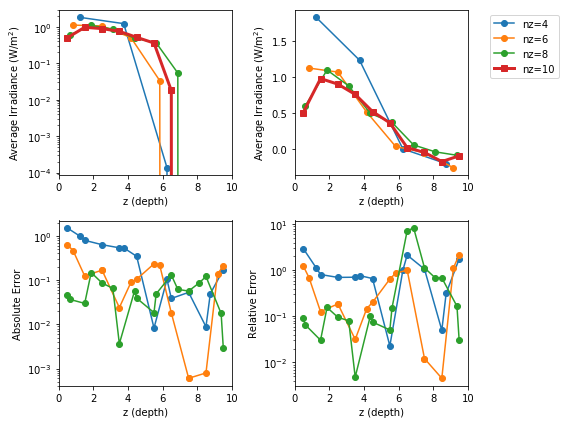

na


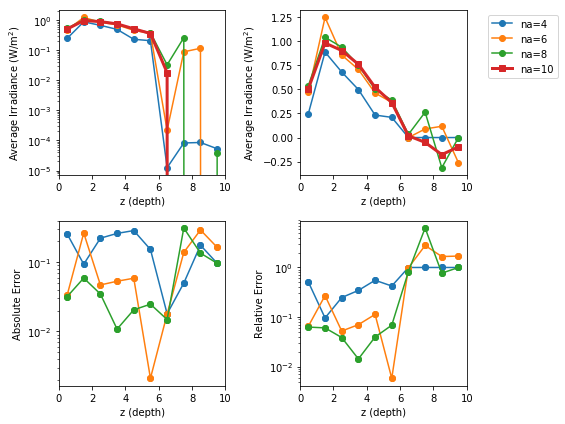

together


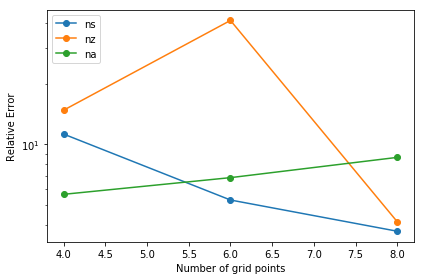

In [16]:
kelp_analyze.grid_study_plot(perceived_irrad_dict, abs_err_arr, rel_err_arr, compute_time_dict, zmin, zmax)
# TODO: Is this correct?

In [ ]:
conn = sqlite3.connect(db_path)
cursor = conn.execute('''
SELECT ns, nz, na
FROM gs1
''')
s = cursor.fetchall()
conn.close()

In [ ]:
perceived_irrad_dict.keys()

In [ ]:
#grid_study_plot(ns_list, nz_list, na_list, perceived_irrad_dict, abs_err_arr, rel_err_arr)

In [ ]:
#grid_study_plot(ns_list, nz_list, na_list, perceived_irrad_dict, abs_err_arr, rel_err_arr)

# Grid Study 2

In [ ]:
# Set parameters
a_water = 0.5
b = 0.05
absorptance_kelp = 0.8
kelp_profile='top-heavy'
ns_max = 16
nz_max = 16
na_max = 2
na_list = range(4,na_max+1,4)

irrad_dict, abs_err_arr, rel_err_arr = grid_study_compute(a_water, absorptance_kelp, kelp_profile, [ns_max], [nz_max], na_list)

In [ ]:
c = ipp.Client()

In [ ]:
c.queue_status()

In [ ]:
# Set parameters
a_water = 0.5
b = 0.05
absorptance_kelp = 0.8
kelp_profile='top-heavy'
ns_max = 20
nz_max = 20
na_max = 20
ns_list = range(4, ns_max+1, 2)
nz_list = range(4, nz_max+1, 2)
na_list = range(4, na_max+1, 2)

ex = cf.ThreadPoolExecutor()
gs2_fut = ex.submit(
    grid_study_compute,
    a_water, absorptance_kelp, kelp_profile, ns_list, nz_list, na_list
)

In [ ]:
perceived_irrad_dict, abs_err_arr, rel_err_arr = gs2_fut.result()

In [ ]:
grid_study_plot(ns_list, nz_list, na_list, perceived_irrad_dict, abs_err_arr, rel_err_arr)

# Asymptotics Accuracy

In [ ]:
# Set parameters
aut8 = [0.144, 0.037]
hao11 = [0.179, 0.219]
nuc2200 = [0.337, 1.583]
nuc2240 = [0.125, 1.205]
petzold_iops = [aut8, hao11, nuc2200, nuc2240]
petzold_names = ['aut8', 'hao11', 'nuc2200', 'nuc2240']

ns = 22
na = 22
nz = 22
kelp_profile='top-heavy'
max_scatter = 16

asym_conv_true_pi = {}
asym_conv_gmres_time = {}

for name, (a_water, b) in zip(petzold_names, petzold_iops):
    # GMRES
    gmres_results = lv.apply(kelp_param.kelp_calculate,
        a_water,
        b,
        ns,
        na,
        nz,
        kelp_profile,
        absorptance_kelp=0.8,
        gmres_flag=True,
        num_scatters=0,
        const=const
    ).result()

    p_kelp = gmres_results['p_kelp']
    true_irrad = gmres_results['irradiance']
    true_rad = gmres_results['radiance']
    asym_conv_gmres_time[name] = gmres_results['duration']
    true_perceived_irrad = np.sum(p_kelp*true_irrad, axis=(0,1)) / np.sum(p_kelp, axis=(0,1))
    asym_conv_true_pi[name] = true_perceived_irrad

In [ ]:
save_dict = {}
res_dict = {}

scat_nums = range(0, max_scatter+1, 4)
# Run scattering cases
for name, (a_water, b) in zip(petzold_names, petzold_iops):
    res_list = []
    save_list = []
    true_perceived_irrad = asym_conv_true_pi[name]
    for n in scat_nums:
        print("n={}".format(n))
        #print("const={}".format(const))
        compute_results = lv.apply(kelp_param.kelp_calculate,
            a_water,
            b,
            ns,
            na,
            nz,
            kelp_profile,
            absorptance_kelp=0.8,
            gmres_flag=False,
            num_scatters=n,
            const=const
        ).result()

        irrad = compute_results['p_kelp']
        irrad = compute_results['irradiance']
        # Perceived irradiance for each depth layer
        perceived_irrad = np.sum(p_kelp*irrad, axis=(0,1)) / np.sum(p_kelp, axis=(0,1))
        perc_abs_err = np.abs(true_perceived_irrad - perceived_irrad)
        perc_rel_err = np.abs((true_perceived_irrad - perceived_irrad)/true_perceived_irrad)

        save_vals = {
            'irrad': irrad.mean(axis=(0,1)),
            'perceived_irrad': perceived_irrad,
            'perc_abs_err': perc_abs_err,
            'perc_rel_err': perc_rel_err,
            'duration': compute_results['duration']
        }

        res_list.append(compute_results)
        save_list.append(save_vals)
    res_dict[name] = res_list
    save_dict[name] = save_list

In [ ]:
import dill

### Plot Convergence Curves

In [ ]:
!mkdir data figures -p

In [ ]:
with open("data/asym_conv_save.dill", 'wb') as fh:
    dill.dump(save_dict, fh)

In [ ]:
with open("data/asym_conv_res.dill", 'wb') as fh:
    dill.dump(res_dict, fh)

In [ ]:
with open("data/asym_conv_gmres.dill", 'wb') as fh:
    dill.dump(gmres_results, fh)

In [ ]:
dz = (zmax-zmin)/nz
z = np.linspace(zmin+0.5*dz, zmax-0.5*dz, nz)
for name, iops in zip(petzold_names, petzold_iops):
    true_perceived_irrad = asym_conv_true_pi[name]
    plt.figure(figsize=[8,6])
    for i, scat in enumerate(res_dict[name]):
        plt.plot(z, save_dict[name][i]['perceived_irrad'], 'o-', label='n={}'.format(scat_nums[i]))
    
    plt.plot(z, np.abs(true_perceived_irrad), 's-', lw=3, label='FD')
    plt.title("{}: a_water={}, b={}".format(name, *iops))
    plt.xlabel('z (m)')
    plt.ylabel(r'Perceived Irradiance ($\mathrm{W/m}^2$)')
    plt.yscale('log')
    plt.legend()
    plt.tight_layout()
    plt.savefig('figures/asym_conv_irrad_{}.png'.format(name), dpi=300)
    
plt.show()

In [ ]:
dz = (zmax-zmin)/nz
z = np.linspace(zmin+0.5*dz, zmax-0.5*dz, nz)
for name, iops in zip(petzold_names, petzold_iops):
    true_perceived_irrad = asym_conv_true_pi[name]
    plt.figure(figsize=[8,6])
    for i, scat in enumerate(res_dict[name]):
        plt.plot(z, save_dict[name][i]['perc_rel_err'], 'o-', label='n={}'.format(scat_nums[i]))
    
    #plt.plot(z, np.abs(true_perceived_irrad), 'o-', label='FD')
    plt.title("{}: a_water={}, b={}".format(name, *iops))
    plt.xlabel('z (m)')
    plt.ylabel('Relative Error: Perceived Irradiance')
    plt.yscale('log')
    plt.legend()
    plt.tight_layout()
    plt.savefig('figures/asym_conv_rel_err_{}.png'.format(name), dpi=300)
    
plt.show()

In [ ]:
plt.figure(figsize=[8,6])
for name, iops in zip(petzold_names[:-2], petzold_iops[:-2]):
    abs_err = np.array([res['perc_abs_err'].mean() for res in save_dict[name]])
    rel_err = np.array([res['perc_rel_err'].mean() for res in save_dict[name]])
    plt.plot(scat_nums, rel_err, 'o-', label='{}: a={}, b={}'.format(name, *iops))
    
plt.xticks(scat_nums)
plt.xlabel('# of Scattering Events')
plt.ylabel('Relative Error (Perceived Irrad)')
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.savefig('figures/asym_conv_compare.png')
plt.show()

In [ ]:
np.array([res['perc_rel_err'].mean() for res in save_dict['aut8']])

# Sensitivity Analysis

In [ ]:
def f(x, y):
    print("x={}, y={}")

In [ ]:
def vary_params(**user_params):
    """Supply lists of param values. Only specify ones you're interested in. 
    Will be varied from base case separately."""
    base_params = {
        'a_water': 0.179,
        'b': 0.219,
        'ns': 16,
        'na': 16,
        'nz': 16,
        'absorptance_kelp': 0.8,
        'kelp_profile': 'top-heavy',
        'gmres_flag': False,
        'num_scatters': 12,
        'const': const
    }
    
    results_dict = {}
    perceived_irrad_dict = {}
    
    # Combine, with user overrides, one at a time.
    for param, vals in user_params.items():
        for val in vals:
            new_params = {**base_params, **{param: val}}
            compute_results = lv.apply(kelp_param.kelp_calculate, **new_params).result()
            results_dict[(param, val)] = compute_results
    
            p_kelp = compute_results['p_kelp']
            irrad = compute_results['irradiance']
            perceived_irrad = np.sum(p_kelp*irrad, axis=(0,1)) / np.sum(p_kelp, axis=(0,1))
            perceived_irrad_dict[(param, val)] = perceived_irrad
            
    
    return results_dict, perceived_irrad_dict

In [ ]:
def plot_params(user_dict, perceived_irrad_dict):
    for param, vals in user_dict.items():
        plt.figure()
        for val in vals:
            perceived_irrad = perceived_irrad_dict[(param, val)]
            nz = len(perceived_irrad)
            dz = (zmax-zmin)/nz
            z = np.linspace(zmin+0.5*dz, zmax-0.5*dz, nz)
            param_str = val
            if param == 'b':
                param_str = 'b/a={:.2f}'.format(val/a_water)
            elif isinstance(val, float):
                param_str = '{:.2f}'.format(val)
            plt.plot(z, perceived_irrad, 'o-', label='{}'.format(param_str))
        #plt.legend(loc='upper left', bbox_to_anchor=(1.05,1))
        plt.legend()
        plt.xlabel('z (m)')
        plt.ylabel(r'Perceived Irradiance ($\mathrm{W/m}^2$)')
        plt.yscale('log')
        plt.savefig('figures/sens_analysis_{}.png'.format(param), dpi=300)
        plt.tight_layout()
        plt.show()

In [ ]:
user_dict = dict(
    kelp_profile=['top-heavy', 'uniform', 'bottom-heavy'],
    absorptance_kelp=np.linspace(0.6,1.0,5),
    b = a_water * np.linspace(0.5, 2.0, 5)
)
results_dict, perceived_irrad_dict = vary_params(**user_dict)

In [ ]:
plot_params(user_dict, perceived_irrad_dict)

In [ ]:
user_dict = dict(
    b = a_water * np.linspace(0.5, 2.0, 10)
)
results_dict, perceived_irrad_dict = vary_params(**user_dict)

In [ ]:
plot_params(user_dict, perceived_irrad_dict)

In [ ]:
user_dict = dict(
    a_water = np.linspace(0.05, 0.5, 10)
)
results_dict, perceived_irrad_dict = vary_params(**user_dict)

In [ ]:
plot_params(user_dict, perceived_irrad_dict)